In [9]:
!sudo apt-get install -y fonts-nanum

!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf
#한글폰트 다운로드

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 24 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/

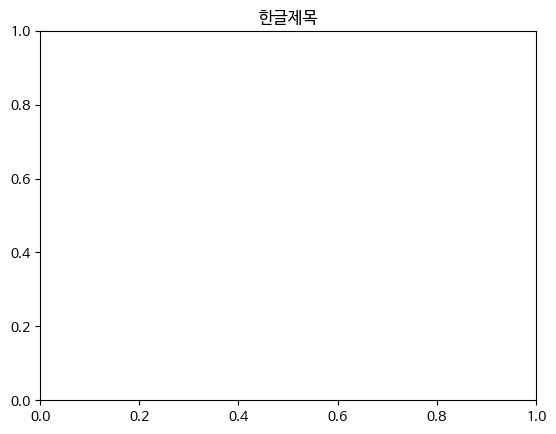

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.rc('font', family='NanumBarunGothic')
# 폰트 불러오기

plt.title('한글제목')
plt.show()
# 폰트 확인

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
# Pandas 디스플레이 옵션 설정
pd.set_option('display.max_columns', None)  # 모든 열 보이기
pd.set_option('display.max_rows', None)     # 모든 행 보이기
pd.set_option('display.width', 1000)        # 출력 너비 설정
pd.set_option('display.max_colwidth', None) # 열의 최대 너비 설정

In [13]:
%cd /content/drive/MyDrive/final_project/data/final_dataset

/content/drive/MyDrive/final_project/data/final_dataset


In [32]:
total_data = pd.read_csv('/content/drive/MyDrive/final_project/data/final_dataset/total_data_v5.csv', encoding = 'cp949')

<ipython-input-32-9ec905298340>:1: DtypeWarning: Columns (10,11,19,20,22,23,25,26) have mixed types. Specify dtype option on import or set low_memory=False.
  total_data = pd.read_csv('/content/drive/MyDrive/final_project/data/final_dataset/total_data_v5.csv', encoding = 'cp949')


In [34]:
total_data = total_data[total_data['분기']>'2017 2Q']
total_data['temp'] = total_data['도로명주소'] + '_' + total_data['전용면적구간'].astype(str)
group = total_data.groupby(['temp'])['결측치연속'].agg(['max']).reset_index()
to_del = group[group['max']>5]['temp']
total_data = total_data[~total_data['temp'].isin(to_del)]
total_data.drop('temp', axis=1, inplace=True)
total_data.shape

(590600, 60)

In [37]:
total_data['도'] = total_data['도로명주소'].apply(lambda x: x.split()[0])
total_data['시군'] = total_data['도로명주소'].apply(lambda x: ' '+x.split()[1] if x.split()[1].endswith(('시','군','구')) else '')
total_data['구'] = total_data['도로명주소'].apply(lambda x: ' '+x.split()[2] if x.split()[2].endswith('구') else '')
total_data['지역'] = total_data['도'] + total_data['시군'] + total_data['구']

In [17]:
total_data['도'].unique()

array(['부산시', '대구시', '인천시', '광주시', '대전시', '울산시', '경기도', '세종시', '서울시',
       '경상남도', '경상북도', '전라남도', '전라북도', '충청남도', '충청북도', '제주도', '강원도'],
      dtype=object)

In [18]:
total_data['지역'].unique()# / #부산시 해운대, 서울시 서초구,

SyntaxError: invalid syntax (<ipython-input-18-fe5475e42a15>, line 1)

In [ ]:
total_data = total_data[['아파트명','법정동주소','도로명주소','세대수', '최고층', '용적률', '건폐율', '전용율', '방수', '욕실수', '현관구조', '건설사', '임대세대비율', '세대당_주차대수', '건축년도', '분기', '거래량', '단위면적당거래금액', '도']]

In [ ]:
total_data_2 = total_data[total_data['전용면적구간'] == 2]

In [ ]:
total_data2_apt = total_data_2[['아파트명','법정동주소','도로명주소','세대수', '최고층', '용적률', '건폐율', '전용율', '방수', '욕실수', '현관구조', '건설사', '임대세대비율', '세대당_주차대수', '건축년도', '분기', '거래량', '단위면적당거래금액', '도']]

In [ ]:
total_data2_apt.isnull().sum()
# 세대수, 용적률, 건설사, 건축년도

In [ ]:
total_data['분기'].unique()

# 세대수

In [ ]:
total_data['세대수'].describe()

In [ ]:
max_households_row = total_data[total_data['세대수'] == total_data['세대수'].max()]

max_households_apartment_name = max_households_row['아파트명'].iloc[0]

print("가장 큰 '세대수'를 가진 아파트명:", max_households_row.iloc[0])

# 가장 큰 '세대수'를 가진 아파트명: 헬리오시티, 서울시 송파구, 9510세대

In [ ]:
second_largest = total_data['세대수'].nlargest(130).iloc[-1]

second_largest


In [ ]:
total_data[total_data['세대수'] == 6864]

In [ ]:
median_households = total_data.groupby('도')['세대수'].median().sort_values(ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(x=median_households.index, y=median_households.values)
plt.title('광역시도별 세대수의 중앙값')
plt.xlabel('광역시도')
plt.ylabel('세대수 중앙값')
plt.xticks(rotation=45)
plt.show()
# 광역시도별 세대수 중앙값 그래프
# 서울시의 경우 세대수가 많을 것으로 예상했으나 세종시가 월등히 높은걸 확인
# 이유: 이미 개발이 많이 된 서울시는 넓은 면적의 아파트계획이 어려움 그리고 상대적으로 높은 평당 가격으로 넓은 구역을 한번에 개발하기 부담
# 정부청사이동으로 세종시의 아파트계획이 활발하며 세단지의 아파트들이 많이 들어옴
# 대한민국 중간에 위치하여 교통의 요충지 역할을 하는 대전은 많은 상주인구를 가지고 있고 그로인해 아파트 개발이 활발함...
# 박스 플록 추가해보기 분포 확인하기

In [ ]:
ordered_regions = total_data.groupby('도')['세대수'].median().sort_values(ascending=False).index

# 박스 플롯 생성
plt.figure(figsize=(15, 8))
sns.boxplot(x='세대수', y='도', data=total_data, order=ordered_regions)
plt.title('광역시도별 세대수 박스플롯')
plt.xlabel('세대수')
plt.ylabel('광역시도')
plt.xticks(rotation=45)
plt.show()

In [ ]:
ordered_regions = total_data.groupby('도')['세대수'].median().sort_values(ascending=False).index

# Set custom background color for the figure and the axes
plt.rcParams['figure.facecolor'] = plt.rcParams['axes.facecolor'] = '#B7DEFD'

# Create a box plot
plt.figure(figsize=(15, 8))
sns.boxplot(x='세대수', y='도', data=total_data, order=ordered_regions, palette=['red' if i in (0,14) else 'blue' for i in range(17)])
plt.title('광역시도별 세대수 박스플롯')
plt.xlabel('세대수')
plt.ylabel('광역시도')
plt.xticks(rotation=45)
plt.show()

In [ ]:
total_data_서울시 = total_data[total_data['도'] == '서울시']

In [ ]:
total_data_세종시 = total_data[total_data['도'] == '세종시']

In [ ]:
plt.figure(figsize=(15, 8))
sns.histplot(data=total_data_서울시, x='세대수', bins=30)
plt.title('서울시 세대수별 빈도')
plt.xlabel('서울시 세대수')
plt.ylabel('빈도')
plt.show()

In [ ]:
plt.figure(figsize=(15, 8))
sns.histplot(data=total_data_세종시, x='세대수', bins=30)
plt.title('세종시 세대수별 빈도')
plt.xlabel('세종시 세대수')
plt.ylabel('빈도')
plt.show()

In [ ]:
total_data.groupby('지역')['세대수'].median().sort_values(ascending=False)
# 서울시가 세대수가 적은 이유는 인구의 과잉으로 다양한 형태의 주거지가 필요
# 토지 가격과 개발비용 상승으로 대규모 프로젝트보단 소규모의 프로젝트 선호
# 많은 기존 인프라의 구축으로 대규모 토지 개발 어려움

# 산업도시 근처의 시들이 상주인구 수용을 위해 대단지들이 많이 설계되는것으로 추정

# 최고층

In [ ]:
median_max_floor = total_data.groupby('도')['최고층'].median().sort_values(ascending=False)

plt.figure(figsize=(10, 6))
median_max_floor.plot(kind='bar')
plt.title('도별 최고층의 중앙값')
plt.xlabel('도')
plt.ylabel('최고층 중앙값')
plt.xticks(rotation=45)
plt.show()

#

# 용적률

In [ ]:
total_data_1 = total_data[total_data['용적률'] != 0]

In [ ]:
total_data_2 = total_data_2[total_data_2['용적률'] != 0]

In [ ]:
total_data_1['용적률'].max()

In [ ]:
total_data_1 = total_data_1[total_data_1['용적률'] <= 1400]

In [ ]:
total_data_2 = total_data_2[total_data_2['용적률'] != 1577]
total_data_2 = total_data_2[total_data_2['건축년도'] > 1973]
#total_data_1 = total_data_1[total_data_1['용적률'] != 1465]

In [ ]:
# '용적률' 열의 75번째 백분위수 계산
percentile_75 = total_data_1['용적률'].quantile(0.75)
percentile_25 = total_data_1['용적률'].quantile(0.25)

# 75번째 백분위수 이하의 데이터만 필터링
total_data_1_filtered = total_data_1[total_data_1['용적률'] >= percentile_25]
total_data_1_filtered = total_data_1[total_data_1['용적률'] <= percentile_75]


In [ ]:
median_floor_area_ratio = total_data.groupby('도')['용적률'].median()

plt.figure(figsize=(10, 6))
median_floor_area_ratio.sort_values(ascending=False).plot(kind='bar')
plt.title('도별 용적률의 중앙값')
plt.xlabel('도')
plt.ylabel('용적률 중앙값')
plt.xticks(rotation=45)
plt.show()

# 인구가 많은 부산시와 서울시가 최고의 효율을 내야하기 때무에 용적률이 높은걸로 나타남

# 건축년도와 상관성을 확인해보자
# 인천시 광주시 변화

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(total_data['건축년도'], total_data['용적률'], alpha=0.5)
plt.title('건축년도에 따른 용적률 변화')
plt.xlabel('건축년도')
plt.ylabel('용적률')
plt.show()
# 이상치 제거 고려
# 최신 년도일수록 분포가 넓어진다

In [ ]:
total_data_1 = total_data_1[total_data_1['분기'] == '2023 3Q']

In [ ]:
plt.rcParams['figure.facecolor'] = plt.rcParams['axes.facecolor'] = '#B7DEFD'
fig,ax=plt.subplots(figsize=(10, 6))
#plt.scatter(total_data_1['건축년도'], total_data_1['용적률'], alpha=0.5)
sns.scatterplot(x=total_data_1['건축년도'], y=total_data_1['용적률'], color='blue', edgecolor=None, alpha=0.3, ax=ax)
plt.title('건축년도에 따른 용적률 변화')
plt.xlabel('건축년도')
plt.ylabel('용적률')
for s in ['top', 'right']: ax.spines[s].set_visible(False)
plt.show()

In [ ]:
yearly_avg = total_data_1.groupby('건축년도')['용적률'].mean()

plt.figure(figsize=(10, 6))
yearly_avg.plot(kind='line')
plt.title('연도별 용적률')
plt.xlabel('건축년도')
plt.ylabel('용적률')
plt.show()

In [ ]:
yearly_avg = total_data_2.groupby('건축년도')['용적률'].mean()

plt.figure(figsize=(10, 6))
yearly_avg.plot(kind='line')
plt.title('연도별 평균 용적률')
plt.xlabel('건축년도')
plt.ylabel('평균 용적률')
plt.show()

In [ ]:
total_data_2[total_data_2['건축년도'] == 1972]['용적률']

In [ ]:
# 건축년도가 최근에 가까울수록 용적률은 올라감을 확인 최고의 효율과 대지 대비 많은 아파트 단지들이 들어서고 있다고 파악할 수 있다.
# 표본이 적어서 이상치의 영향을 많이 받았다
# 이상치 제거 고려
# 최신 년도일수록 분포가 넓어진다

In [ ]:
total_data_1['용적률'].max()

In [ ]:
total_data[total_data['용적률'] == 1577]

# 건폐율

In [ ]:
median_site_coverage = total_data.groupby('도')['건폐율'].median().sort_values(ascending=False)

plt.figure(figsize=(10, 6))
median_site_coverage.plot(kind='bar')
plt.title('도별 건폐율의 중앙값')
plt.xlabel('도')
plt.ylabel('건폐율 중앙값')
plt.xticks(rotation=45)
plt.show()

# 상자그림 활용

# 전용률

In [ ]:
median_exclusive_use_area_ratio = total_data.groupby('도')['전용율'].median().sort_values(ascending=False)

plt.figure(figsize=(10, 6))
bars = plt.bar(median_exclusive_use_area_ratio.index, median_exclusive_use_area_ratio.values)

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom')

plt.title('도별 전용율의 중앙값')
plt.xlabel('도')
plt.ylabel('전용율 중앙값')
plt.xticks(rotation=45)
plt.show()

# 법적규제에 넘지 않는 최적의 전용률을 위해 모두가 높은 걸로 나타남
#

# 방수 & 욕실수
- 공유 드라이브 EDA_기타

# 현관구조

In [ ]:
sns.countplot(x='현관구조', data=total_data)
plt.title('현관구조 분포')
plt.xlabel('현관구조')
plt.ylabel('빈도')
plt.show()

# 0: 계단식
# 1: 복합식
# 2: 복도식

In [ ]:
distribution = total_data['현관구조'].value_counts(normalize=True) * 100

plt.figure(figsize=(8, 8))
plt.pie(distribution, labels=distribution.index, autopct='%1.1f%%', startangle=140)
plt.title('현관구조의 데이터 수 분포')
plt.show()

# 건설사

In [ ]:
# filtered_data_construction = total_data[total_data['건설사'] == 1]

province_counts = filtered_data_construction['도'].value_counts().sort_values(ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(x=province_counts.index, y=province_counts.values)
plt.title('프리미엄 건설사 분포')
plt.xlabel('광역시도')
plt.ylabel('건설사 분포')
plt.xticks(rotation=45)
plt.show()

# 규모가 큰 신도시의 건설사를 비교해보자
# 충청남도 대구시 변화
# 차별화된 프리미엄브랜드는 서울 일부 지역에만 건설하는 경영전략

In [ ]:
# '분기'가 '2021 3Q'인 데이터 필터링
filtered_data = total_data[total_data['분기'] == '2023 3Q']

# '아파트명', '도로명주소'로 그룹화 후 '건설사'가 1인 행들만 선택
grouped_data = filtered_data.groupby(['아파트명', '도로명주소']).filter(lambda x: (x['건설사'] == 1).any())

# 이후 '도'별로 그룹화하고 '건설사'의 합 계산 후 내림차순 정렬
province_construction_sum = grouped_data.groupby('도')['건설사'].sum().reset_index().sort_values(by='건설사', ascending=False)

# 바 차트 시각화
plt.figure(figsize=(12, 6))
sns.barplot(x='도', y='건설사', data=province_construction_sum)
plt.title('광역시도별 건설사 분포')
plt.xlabel('광역시도')
plt.ylabel('브랜드 아파트 수')
plt.xticks(rotation=45)
plt.show()



In [ ]:
grouped_data

In [ ]:
# Assuming total_data is already defined and contains the required data
# '분기'가 '2023 3Q'인 데이터 필터링
filtered_data = total_data[(total_data['분기'] == '2023 3Q') & (total_data['건축년도'] >= 2010)]
#

# '아파트명', '도로명주소'로 그룹화 후 '건설사'가 1인 행들만 선택
# Note: This step requires a clarification. Assuming '건설사' column is a binary flag (1 or 0)
#grouped_data = filtered_data.groupby(['아파트명', '도로명주소']).filter(lambda x: x['건설사'].sum() == 1)

# Calculate the ratio of rows where '건설사' is 1 to the total number of rows in total_data
ratio = len(grouped_data) / len(total_data)

# 이후 '도'별로 그룹화하고 '건설사'의 합 계산 후 내림차순 정렬
province_construction_sum = filtered_data.groupby('도')['건설사'].mean().reset_index().sort_values(by='건설사', ascending=False)

# 바 차트 시각화
fig,ax=plt.subplots(figsize=(12, 6))
sns.barplot(x='도', y='건설사', data=province_construction_sum, palette=['red']*3+['blue']*14,ax=ax)
plt.title('광역시도별 건설사 분포')
plt.xlabel('광역시도')
plt.ylabel('브랜드 아파트 수')
plt.xticks(rotation=45)
for s in ['top', 'right']: ax.spines[s].set_visible(False)
plt.show()

In [ ]:
selected_areas = ['서울시 강남구', '서울시 서초구', '서울시 송파구']
filtered_data_selected_areas = filtered_data[filtered_data['지역'].isin(selected_areas)]

In [ ]:
selected_areas = ['서울시 강남구', '서울시 서초구', '서울시 송파구']
filtered_data_selected_areas = filtered_data[filtered_data['지역'].isin(selected_areas)]

filtered_data = total_data[(total_data['분기'] == '2023 3Q') & (total_data['건축년도'] >= 2010)]

# 이후 '도'별로 그룹화하고 '건설사'의 합 계산 후 내림차순 정렬
province_construction_sum = filtered_data_selected_areas.groupby('지역')['건설사'].mean().reset_index().sort_values(by='건설사', ascending=False)

# 바 차트 시각화
plt.figure(figsize=(12, 6))
sns.barplot(x='지역', y='건설사', data=province_construction_sum)
plt.title('광역시도별 건설사 분포')
plt.xlabel('광역시도')
plt.ylabel('브랜드 아파트 수')
plt.xticks(rotation=45)
plt.show()

In [ ]:
filtered_data = total_data[(total_data['분기'] == '2023 3Q') & (total_data['건축년도'] > 2010)]

# Calculate the proportion of rows where '건설사' is 1 in this filtered data
proportion_construction = filtered_data['건설사'].mean()

# Create a bar plot to visualize this proportion
plt.figure(figsize=(6, 4))
sns.barplot(x=['건설사'], y=[proportion_construction])
plt.title('2023 3Q 및 2010년 이후 건축 건설사 1인 비율')
plt.ylabel('비율')
plt.show()

In [ ]:
proportion_construction

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['figure.facecolor'] = plt.rcParams['axes.facecolor'] = '#B7DEFD'

# Assuming total_data is already defined and contains the required data
# Filter data for '분기' being '2023 3Q' and '건축년도' being equal to or after 2010
filtered_data = total_data[(total_data['분기'] == '2023 3Q') & (total_data['건축년도'] >= 2010)]

# Select specific areas
selected_areas = ['서울시 강남구', '서울시 서초구', '서울시 송파구']
filtered_data_selected_areas = filtered_data[filtered_data['지역'].isin(selected_areas)]

# Group by '지역' and calculate the mean of '건설사', then sort the results
province_construction_sum = filtered_data_selected_areas.groupby('지역')['건설사'].mean().reset_index().sort_values(by='건설사', ascending=False)

# Calculate the overall proportion of '건설사' being 1
proportion_construction = filtered_data['건설사'].mean()

# Set up a subplot layout
fig, ax = plt.subplots(figsize=(10, 6))

province_construction_sum
province_construction_sum.loc[3,['지역','건설사']] = ['전국', proportion_construction]

# First subplot
sns.barplot(x='지역', y='건설사', data=province_construction_sum, ax=ax, palette=['red']*3+['blue'])
ax.set_title('브랜드 아파트 평균 비율')
ax.set_xlabel('광역시도')
ax.set_ylabel('브랜드 아파트 평균 수')
ax.tick_params(axis='x', rotation=45)
for s in ['top', 'right']: ax.spines[s].set_visible(False)

'''
# Second subplot
sns.barplot(x=['건설사'], y=[proportion_construction], ax=axes[1])
axes[1].set_title('2023 3Q 및 2010년 이후 건축 전체 건설사 1인 비율')
axes[1].set_ylabel('전체 비율')

plt.tight_layout()
plt.show()
'''

In [ ]:
filtered_data_23_3Q.shape

In [ ]:
region_construction_sum = total_data[total_data['건설사'] == 1].groupby('지역')['건설사'].sum()

sorted_region_construction_sum = region_construction_sum.sort_values(ascending=False)

print(sorted_region_construction_sum)
# 서울시 강남구, 세종시 세종시 ,충청남도 천안시 서북구, 경기도 안양시 만안구, 충청남도 예산군

In [ ]:
interested_regions = ['세종시 세종시', '충청남도 천안시 서북구', '부산시 해운대구', '경기도 안양시 만안구']
filtered_data = total_data[total_data['지역'].isin(interested_regions)]

grouped_data = filtered_data.groupby(['지역', '건설사'])['단위면적당거래금액'].mean().reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(x='지역', y='단위면적당거래금액', hue='건설사', data=grouped_data)
plt.title('지역별 건설사에 따른 단위면적당거래금액 차이')
plt.xlabel('지역')
plt.ylabel('단위면적당거래금액')
plt.xticks(rotation=45)
plt.legend(title='건설사')
plt.show()

In [ ]:
filtered_date.info()

In [ ]:
total_data.info()

In [ ]:
# Assuming total_data is already defined and contains the required data
interested_regions = ['충청남도 천안시 서북구', '부산시 해운대구', '경상남도 김해시', '서울시 강남구', '인천시 연수구']
filtered_data = total_data[total_data['지역'].isin(interested_regions)]
filtered_data = filtered_data[(filtered_data['건축년도'] >= 2010) & (filtered_data['분기'] == '2023 3Q')] # & (filtered_data['전용면적구간'] == 2)]

grouped_data = filtered_data.groupby(['지역', '건설사'])['단위면적당거래금액'].mean().reset_index()

# Get default colors from Seaborn
default_colors = sns.color_palette()
custom_colors = {0: default_colors[0], 1: default_colors[3]}  # Assuming the first color is the blue you want

plt.figure(figsize=(12, 6))
sns.barplot(x='지역', y='단위면적당거래금액', hue='건설사', data=grouped_data, palette=custom_colors)
plt.title('지역별 건설사에 따른 단위면적당거래금액 차이')
plt.xlabel('지역')
plt.ylabel('단위면적당거래금액')
plt.xticks(rotation=45)
plt.legend(title='건설사')
plt.show()

In [ ]:
# Assuming total_data is already defined and contains the required data
interested_regions = ['서울시 강남구', '인천시 연수구', '부산시 해운대구', '충청남도 천안시 서북구', '부산시 해운대구']
filtered_data = total_data[total_data['지역'].isin(interested_regions)]
filtered_data = filtered_data[(filtered_data['건축년도'] >= 2010) & (filtered_data['분기'] == '2023 3Q')]

grouped_data = filtered_data.groupby(['지역', '건설사'])['단위면적당거래금액'].mean().reset_index()

# Get default colors from Seaborn
default_colors = sns.color_palette()
custom_colors = {0: default_colors[0], 1: default_colors[3]}  # Custom colors for the bars

plt.figure(figsize=(12, 6))
sns.barplot(x='지역', y='단위면적당거래금액', hue='건설사', data=grouped_data, palette=custom_colors, order=interested_regions)
plt.title('지역별 건설사에 따른 단위면적당거래금액 차이')
plt.xlabel('지역')
plt.ylabel('단위면적당거래금액')
plt.xticks(rotation=45)
plt.legend(title='건설사')
plt.show()

In [ ]:
yesan_data = total_data[total_data['지역'] == '충청남도 예산군']

correlation_with_price = total_data.corrwith(yesan_data['단위면적당거래금액'])

sorted_correlation = correlation_with_price.sort_values(ascending=False)

print(sorted_correlation)
# 건설사보단 건축년도 욕실수 등이 더 상관성이 높았다.
# 건설사보단 주택 내부적인 요인 욕실수, 최고층, 방수 등이 더 중요한 요인으로 분석됨

In [ ]:
danayang_data = total_data[total_data['지역'] == '충청북도 단양군']

correlation_with_price = total_data.corrwith(danayang_data['단위면적당거래금액'])

sorted_correlation = correlation_with_price.sort_values(ascending=False)

print(sorted_correlation)
# 건설사보단 주택 내부적인 요인 욕실수, 최고층, 방수 등이 더 중요한 요인으로 분석됨

In [ ]:
gamgnam_data = total_data[total_data['지역'] == '서울시 강남구']

correlation_with_price = total_data.corrwith(gamgnam_data['단위면적당거래금액'])

sorted_correlation = correlation_with_price.sort_values(ascending=False)

print(sorted_correlation)
# 건설사의 상관성이 확실히 예산군 보단 높다

In [ ]:
sejong_data = total_data[total_data['지역'] == '세종시 세종시']

correlation_with_price = total_data.corrwith(sejong_data['단위면적당거래금액'])

sorted_correlation = correlation_with_price.sort_values(ascending=False)

print(sorted_correlation)
# 건설사와 상관성이 높다

In [ ]:
# 최근 아파트일수록 건설사의 영향을 많이 받을 것 이다.

# 임대세대비율

In [ ]:
median_site_coverage = total_data.groupby('도')['임대세대비율'].mean().sort_values(ascending=False)

# 시각화
plt.figure(figsize=(10, 6))
median_site_coverage.plot(kind='bar')
plt.title('도별 임대세대비율의 중앙값')
plt.xlabel('도')
plt.ylabel('임대세대비율 중앙값')
plt.xticks(rotation=45)
plt.show()

# 임대세대가 있는 아파트와 없는 아파트
# 세대수를 고려
# 타겟이 되는 아파트를 정해서 주변 단지의 비슷한 조건의 임대 세대가 없는 아파트를 비교

In [ ]:
total_data_EDA = total_data


avg_starbucks_by_city = total_data_EDA.groupby('도')['임대세대비율'].sum().sort_values(ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(x=avg_starbucks_by_city.index, y=avg_starbucks_by_city.values)
plt.title('도시 별 임대세대비율')
plt.xlabel('도시')
plt.ylabel('평균 임대세대비율')
plt.xticks(rotation=45)  # 도시 이름이 길 경우 라벨을 회전시킵니다.
plt.show()

In [ ]:
# '도'별 총 세대수 계산
total_units_by_city = total_data_EDA.groupby('도')['세대수'].sum()

# '도'별 임대세대비율 합계 계산
total_rental_ratio_by_city = total_data_EDA.groupby('도')['임대세대비율'].sum()

# 총 세대수 대비 임대세대비율 합계 계산
avg_rental_ratio_by_city = total_rental_ratio_by_city / total_units_by_city
avg_rental_ratio_by_city_sorted = avg_rental_ratio_by_city.sort_values(ascending=False)

# 시각화
plt.figure(figsize=(12, 6))
sns.barplot(x=avg_rental_ratio_by_city_sorted.index, y=avg_rental_ratio_by_city_sorted.values)
plt.title('도시 별 총 세대수 대비 임대세대비율')
plt.xlabel('도시')
plt.ylabel('총 세대수 대비 임대세대비율')
plt.xticks(rotation=45)
plt.show()

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# total_data_EDA 데이터프레임이 이미 정의되어 있다고 가정합니다.

# '도'별 임대세대비율이 0이 아닌 행의 임대세대비율 합계 계산
total_rental_ratio_non_zero_by_city = total_data_EDA[total_data_EDA['임대세대비율'] != 0].groupby('도')['임대세대비율'].sum()

# '도'별 총 행 수 계산
total_rows_by_city = total_data_EDA.groupby('도').size()

# 총 행 수 대비 임대세대비율 합계 계산
avg_rental_ratio_by_city = total_rental_ratio_non_zero_by_city / total_rows_by_city
avg_rental_ratio_by_city_sorted = avg_rental_ratio_by_city.sort_values(ascending=False)

# 시각화
plt.figure(figsize=(12, 6))
sns.barplot(x=avg_rental_ratio_by_city_sorted.index, y=avg_rental_ratio_by_city_sorted.values)
plt.title('도시 별 총 행 수 대비 임대세대비율 (0이 아닌 값)')
plt.xlabel('도시')
plt.ylabel('총 행 수 대비 임대세대비율')
plt.xticks(rotation=45)
plt.show()


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# total_data_EDA 데이터프레임이 이미 정의되어 있다고 가정합니다.

# '도'별 '임대세대비율'이 0이 아닌 행의 수 계산
non_zero_rental_ratio_count_by_city = total_data_EDA[total_data_EDA['임대세대비율'] != 0].groupby('도').size()

# '도'별 총 행 수 계산
total_rows_by_city = total_data_EDA.groupby('도').size()

# 총 행 수 대비 '임대세대비율'이 0이 아닌 행의 비율 계산
proportion_non_zero_by_city = non_zero_rental_ratio_count_by_city / total_rows_by_city
proportion_non_zero_by_city_sorted = proportion_non_zero_by_city.sort_values(ascending=False)

# 시각화
plt.figure(figsize=(12, 6))
sns.barplot(x=proportion_non_zero_by_city_sorted.index, y=proportion_non_zero_by_city_sorted.values)
plt.title('도시 별 총 행 수 대비 임대세대비율이 0이 아닌 행의 비율')
plt.xlabel('도시')
plt.ylabel('임대세대비율이 0이 아닌 행의 비율')
plt.xticks(rotation=45)
plt.show()


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

grouped_data = total_data_EDA.groupby(['아파트명', '도로명주소'])

non_zero_rental_ratio_count_by_city = total_data_EDA[total_data_EDA['임대세대비율'] != 0].groupby('도').size()

total_rows_by_city = total_data_EDA.groupby('도').size()

proportion_non_zero_by_city = non_zero_rental_ratio_count_by_city / total_rows_by_city
proportion_non_zero_by_city_sorted = proportion_non_zero_by_city.sort_values(ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(x=proportion_non_zero_by_city_sorted.index, y=proportion_non_zero_by_city_sorted.values)
plt.title('도시 별 총 행 수 대비 임대세대비율이 0이 아닌 행의 비율 (아파트명, 도로명주소 그룹화 후)')
plt.xlabel('도시')
plt.ylabel('임대세대비율이 0이 아닌 행의 비율')
plt.xticks(rotation=45)
plt.show()


In [ ]:
total_data.groupby('지역')['임대세대비율'].sum().sort_values(ascending=False)
# 서울시가 압도적으로 높음

In [ ]:
seocho_data = total_data[total_data['지역'] == '서울시 서초구']

rental_zero_secho = seocho_data[seocho_data['임대세대비율'] == 0]
rental_non_zero_secho = seocho_data[seocho_data['임대세대비율'] != 0]

In [ ]:
rental_zero_secho
# 반포푸르지오 237
# 반포힐스테이트 397

In [ ]:
filtered_data = rental_zero_secho[(rental_zero_secho['세대수'] >= 250) & (rental_zero_secho['세대수'] <= 350) & (rental_zero_secho['전용면적구간'] == 2)]

selected_columns = filtered_data[['아파트명', '세대수']]

print(selected_columns)

# 신도시(건축년도, 세대수, 브랜드)

In [ ]:
rental_non_zero_secho
# 신반포자이 298
# 배아트자이 243
# 래미안리더스원 299
# 래미안서초스위트 277

In [ ]:
apartments = [
    {'아파트명': '임광3차', '세대수': 316}, # 임대세대 없음
    {'아파트명': '반포힐스테이트', '세대수': 397}, # 임대세대 없음
    {'아파트명': '서초롯데캐슬프레지던트', '세대수': 280}, # 임대세대 있음
    {'아파트명': '서초포레스타7단지', '세대수': 310} # 임대세대 있음
]

filtered_data = total_data[total_data['전용면적구간'] == 2]

for apt in apartments:
    apt_data = filtered_data[(filtered_data['아파트명'] == apt['아파트명']) & (filtered_data['세대수'] == apt['세대수'])]
    avg_price = apt_data['단위면적당거래금액'].mean()
    print(f"{apt['아파트명']} (세대수 {apt['세대수']}): 단위면적당거래금액 평균 = {avg_price}")


In [ ]:
seocho_data = total_data[total_data['지역'] == '서울시 서초구']

correlation = seocho_data['단위면적당거래금액'].corr(seocho_data['임대세대비율'])

print("단위면적당거래금액과 임대세대비율의 상관관계:", correlation)

In [ ]:
seocho_data = total_data[total_data['지역'] == '강원도 원주시']

rental_zero_Wonju = seocho_data[seocho_data['임대세대비율'] == 0]
rental_non_zero_Wonju = seocho_data[seocho_data['임대세대비율'] != 0]

In [ ]:
filtered_data = rental_zero_Wonju[(rental_zero_Wonju['세대수'] >= 250) & (rental_zero_Wonju['세대수'] <= 350) & (rental_zero_Wonju['전용면적구간'] == 2)]

selected_columns = filtered_data[['아파트명', '세대수']]

print(selected_columns)

In [ ]:
apartments = [
    {'아파트명': '삼천리1차', '세대수': 291}, # 임대세대 없음
    #{'아파트명': '반포힐스테이트', '세대수': 397}, # 임대세대 없음
    #{'아파트명': '임대새대', '세대수': 280}, # 임대세대 있음
    {'아파트명': '단계이안2단지', '세대수': 298} # 임대세대 있음
]

filtered_data = total_data[total_data['전용면적구간'] == 2]

for apt in apartments:
    apt_data = filtered_data[(filtered_data['아파트명'] == apt['아파트명']) & (filtered_data['세대수'] == apt['세대수'])]
    avg_price = apt_data['단위면적당거래금액'].mean()
    print(f"{apt['아파트명']} (세대수 {apt['세대수']}): 단위면적당거래금액 평균 = {avg_price}")

In [ ]:
seocho_data = total_data[total_data['지역'] == '강원도 원주시']

correlation = seocho_data['단위면적당거래금액'].corr(seocho_data['임대세대비율'])

print("단위면적당거래금액과 임대세대비율의 상관관계:", correlation)

In [ ]:
#삼천리1차 291
# 임대새대 없음

In [ ]:
# 단계이안2단지 298
# 임대세대 있음

# 건축년도

In [ ]:
median_site_coverage = total_data.groupby('도')['건축년도'].mean().sort_values(ascending=False)

# 시각화
plt.figure(figsize=(10, 6))
median_site_coverage.plot(kind='bar')
plt.title('도별 건축년도의 중앙값')
plt.xlabel('도')
plt.ylabel('건축년도 중앙값')
plt.xticks(rotation=45)
plt.show()

In [ ]:
line_data = total_data.groupby(['건축년도', '도']).size().reset_index(name='counts')
max_building_per_year = line_data.groupby('건축년도')['counts'].idxmax()
# 라인 그래프 작성
plt.figure(figsize=(12, 6))
line_plot = sns.lineplot(x='건축년도', y='counts', hue='도', data=line_data, marker='o')

# 각 년도별 최고 빌딩 수에 해당하는 '건축년도'에 대한 텍스트 추가
for year in line_data['건축년도'].unique():
    idx = max_building_per_year[year]
    max_building_data = line_data.loc[idx]
    plt.text(max_building_data['건축년도'], max_building_data['counts'], max_building_data['건축년도'],
             horizontalalignment='left', size='medium', color='black', weight='semibold')

plt.title('년도별 신축 아파트의 건축년도')
plt.xlabel('건축년도')
plt.ylabel('신축 아파트')
plt.xticks(rotation=45)
plt.show()

# 경기도의 신축 아파트는 3-5년 단위로 꾸준함
# 서울시의 신축 아파트는 2002년 이후로 꾸준히 하락세를 보이고 있음
# 2017년 문재인 정부의 재건축초과이익환수제, 조합원 지위 양도제한으로 서울지역의 재건축 기대감 감소로 경기도 지역 신축아파트 증가
# 2017년 부근 평택 고덕의 삼성반도체 공장 설립으로 아파트 설립 증가

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='도', y='건축년도', data=total_data)
plt.title('신축 아파트 분포도')
plt.xlabel('광역시도')
plt.ylabel('건축년도')
plt.xticks(rotation=45)
plt.show()
# 정부청사 이전으로 세종시의 아파트들은 신축지수가 높음

In [38]:
total_data_서울 = total_data[(total_data['분기'] == '2021 3Q') & (total_data['전용면적구간'] == 2) & (total_data['도'] == '서울시')]

In [39]:
total_data_광주 = total_data[(total_data['분기'] == '2021 3Q') & (total_data['전용면적구간'] == 2) & (total_data['도'] == '광주시')]

In [ ]:
total_data.info()

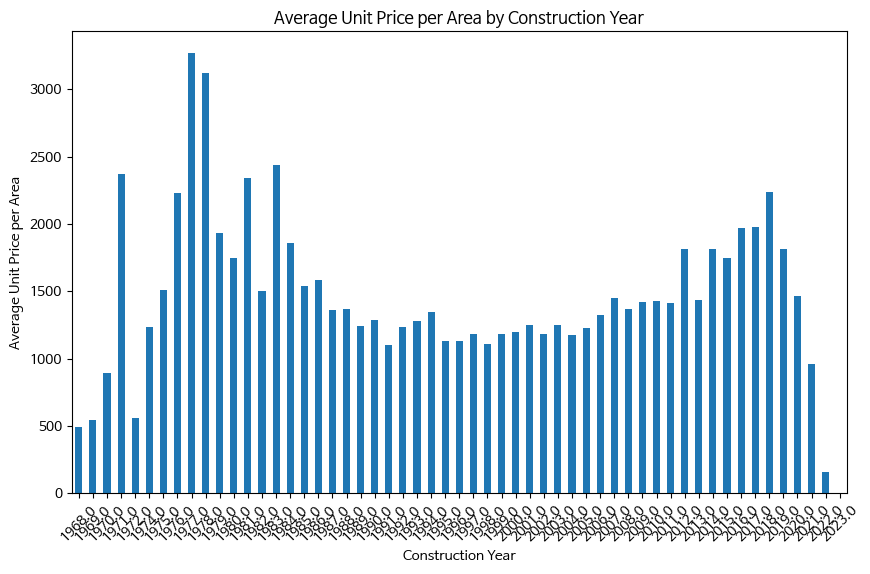

In [21]:
grouped_data = total_data_서울.groupby('건축년도')['단위면적당거래금액'].mean()

# 결과를 시각화합니다.
grouped_data.plot(kind='bar', figsize=(10, 6))
plt.title('Average Unit Price per Area by Construction Year')
plt.xlabel('Construction Year')
plt.ylabel('Average Unit Price per Area')
plt.xticks(rotation=45)
plt.show()

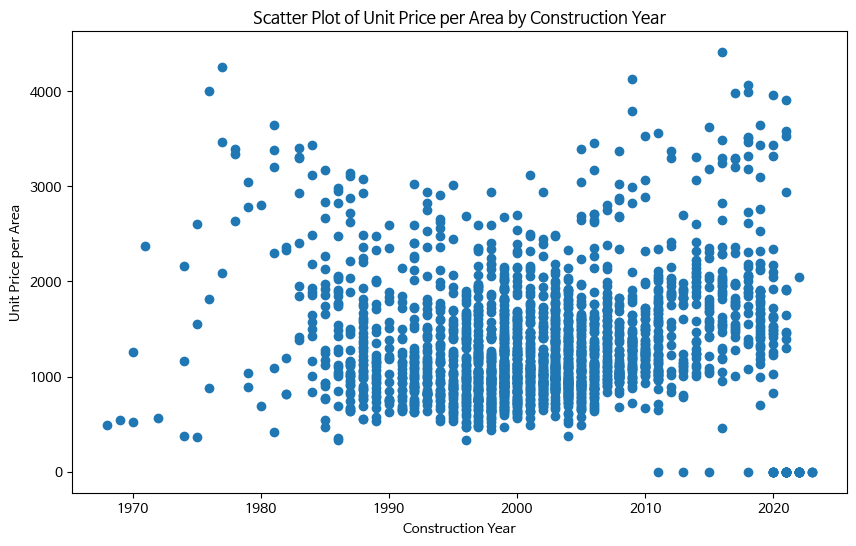

In [22]:
# 산점도를 그립니다.
plt.figure(figsize=(10, 6))
plt.scatter(total_data_서울['건축년도'], total_data_서울['단위면적당거래금액'])
plt.title('Scatter Plot of Unit Price per Area by Construction Year')
plt.xlabel('Construction Year')
plt.ylabel('Unit Price per Area')
plt.show()

In [ ]:
total_data_서울 = total_data_서울[total_data_서울['단위면적당거래금액'] != 0]

In [28]:
grouped_data = total_data_서울.groupby('건축년도')['단위면적당거래금액'].mean().reset_index()

In [31]:
total_data_서울[total_data_서울['단위면적당거래금액']==0][['아파트명','건축년도','결측치연속']]

,아파트명,건축년도,결측치연속
614070,개포자이프레지던스,2023.0,23.0
618503,래미안라클래시,2021.0,23.0
621541,강남센트럴아이파크,2022.0,23.0
624207,강남자곡힐스테이트,2015.0,23.0
633414,힐데스하임천호,2022.0,23.0
633817,꿈의숲한신더휴,2022.0,23.0
643117,신마곡벽산블루밍,2020.0,23.0
646961,우장산숲아이파크,2022.0,23.0
648325,e편한세상서울대입구2차,2020.0,23.0
650805,가야위드안(주상복합),2020.0,23.0


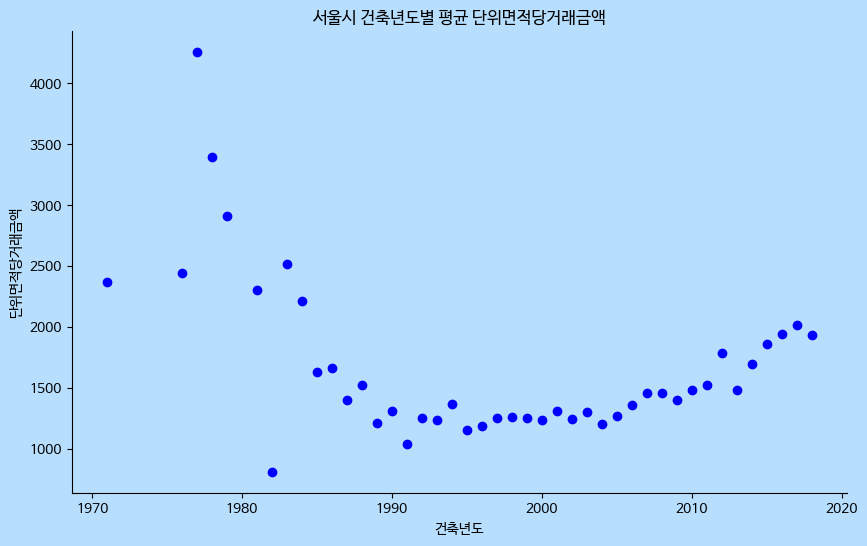

In [40]:
grouped_data = total_data_서울.groupby('건축년도')['단위면적당거래금액'].mean().reset_index()

plt.rcParams['figure.facecolor'] = plt.rcParams['axes.facecolor'] = '#B7DEFD'

# 산점도를 그립니다.
_,ax = plt.subplots(figsize=(10, 6))
plt.scatter(grouped_data['건축년도'], grouped_data['단위면적당거래금액'],color='blue')
plt.title('서울시 건축년도별 평균 단위면적당거래금액')
plt.xlabel('건축년도')
plt.ylabel('단위면적당거래금액')
for s in ['top', 'right']: ax.spines[s].set_visible(False)
plt.show()

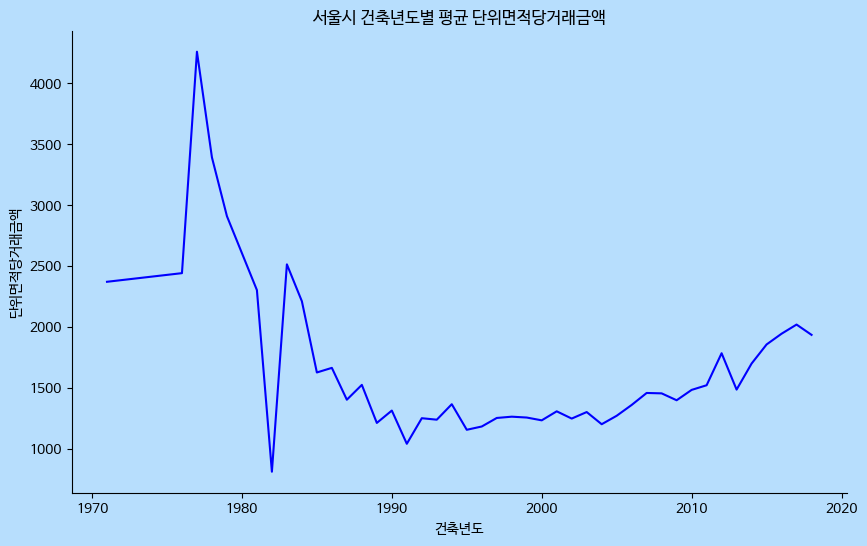

In [43]:
grouped_data = total_data_서울.groupby('건축년도')['단위면적당거래금액'].mean().reset_index()

# 백그라운드 컬러 설정
plt.rcParams['figure.facecolor'] = plt.rcParams['axes.facecolor'] = '#B7DEFD'

# 라인 그래프 생성
_, ax = plt.subplots(figsize=(10, 6))
plt.plot(grouped_data['건축년도'], grouped_data['단위면적당거래금액'], color='blue')
plt.title('서울시 건축년도별 평균 단위면적당거래금액')
plt.xlabel('건축년도')
plt.ylabel('단위면적당거래금액')
for s in ['top', 'right']: ax.spines[s].set_visible(False)
plt.show()


In [ ]:
stop

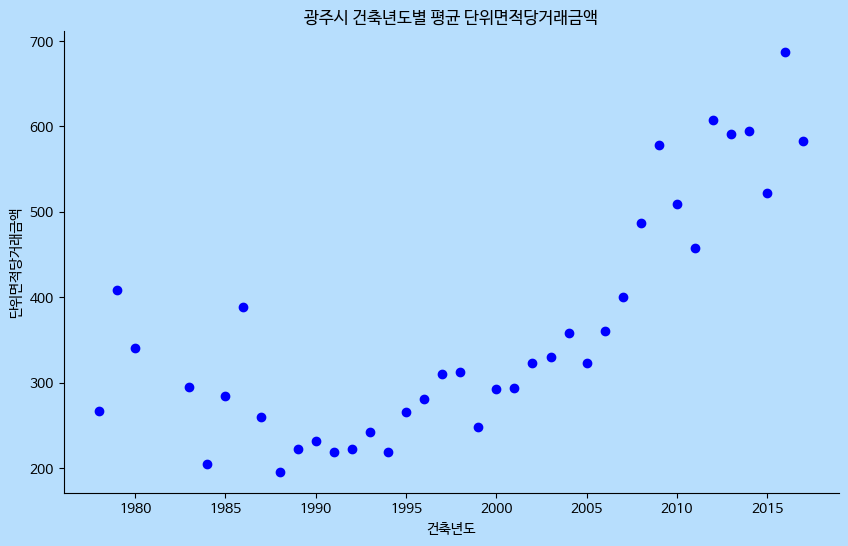

In [42]:
grouped_data = total_data_광주.groupby('건축년도')['단위면적당거래금액'].mean().reset_index()

# 산점도를 그립니다.
_,ax = plt.subplots(figsize=(10, 6))
plt.scatter(grouped_data['건축년도'], grouped_data['단위면적당거래금액'],color='blue')
plt.title('광주시 건축년도별 평균 단위면적당거래금액')
plt.xlabel('건축년도')
plt.ylabel('단위면적당거래금액')
for s in ['top', 'right']: ax.spines[s].set_visible(False)
plt.show()

In [ ]:
# 전북? 광주?

In [ ]:
total_data['단위면적당거래금액'].max()

In [ ]:
total_data[total_data['단위면적당거래금액'] == 4986.014836434391]

In [ ]:
import statsmodels.api as sm

X = total_data['건축년도']
y = total_data['단위면적당거래금액']
X = sm.add_constant(X)  # 상수항 추가
model = sm.OLS(y, X).fit()

# 시각화
plt.figure(figsize=(10, 6))
sns.regplot(x='건축년도', y='단위면적당거래금액', data=total_data, line_kws={'color': 'red'})
plt.title('건축년도와 단위면적당거래금액의 회귀 관계')
plt.show()

# 결과 해석
print(model.summary())

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm

# 그룹화
grouped_data = total_data.groupby(['아파트명', '도로명주소'])

# 각 그룹별로 회귀 분석 및 시각화
for (apt_name, address), group in grouped_data:
    X = group['건축년도']
    y = group['단위면적당거래금액']
    X = sm.add_constant(X)  # 상수항 추가
    model = sm.OLS(y, X).fit()

    plt.figure(figsize=(10, 6))
    sns.regplot(x='건축년도', y='단위면적당거래금액', data=group, line_kws={'color': 'red'})
    plt.title(f'{apt_name}, {address} - 건축년도와 단위면적당거래금액의 회귀 관계')
    plt.show()

    print(f'그룹: {apt_name}, {address}')
    print(model.summary())
    print('-'*80)


# 거래량
- 공유 드라이브 EDA_기타 참고